# Transfer Learning:

&emsp;O objetivo deste notebook é apresentar o tema transfer learning, assim como mostrar exemplos prático de como fazer e quais as vantagens relacionadas ao seu uso. As informações e exemplos são livremente adaptados deste excelente post no [Medium](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a).

### Introdução

&emsp;Redes neurais, assim como *deep learning*, são temas em alta quando o assunto é ***machine learning*** no mundo atual. Na realidade *machine learning* é um dos temas mais tratados em técnologia, sendo *Transfer Learning*, talvez, uma das motrizes mais importantes em impulsionar o desenvolvimento de *deep learning*, e para falar sobre um tema tão importante e complexo, primeiro precisamos elucidar um pouco os temas citados anteriormente.

&emsp;Redes neurais são algoritmos de aprendizado por máquina que buscam mimetizar o comportamento do cérebro humano, afinal com eles buscamos fazer com que o computador aprenda uma determinada tarefa. Neste âmbito faz sentido falar em fazer o computador aprender à semelhança do que ocorre no processo de aprendizado realizado por nosso sistema nervoso constantemente, desde antes de nascermos. Esta é a função dos algoritmos de redes neurais, que hoje já evoluiram enormemente, estando disponíveis diversas arquiteturas diferentes: Convolucionais, recorrentes, memórias de longo e curto prazo, etc.

&emsp;O termo *deep learning* é utilizado para se referir à estruturas de redes neurais profundas, como o próprio nome diz. Redes profundas são aquelas dotadas de muitas camadas e, mais simplificadamente, dotadas de muitos parâmetros treináveis. Estes parâmetros são efetivamente o que é desejado que uma rede aprenda, parâmetros corretos de uma rede neural podem levá-la a níveis de generalização que uma pessoa não consegue. O grande problema de termos muitos destes parâmetros está no fato que quanto mais profunda a rede, maior é a demanda computacional de processamento e de quantidade de dados na base para realizar o treinamento. Em poucas palavras, uma rede profunda tem capacidade maior de aprendizado, mas em troca custa muito, é dificimente acessível com os computadores que temos em casa atualmente e precisa de quantidades realmente grandes de dados. 

&emsp;Dentro deste contexto de dificuldade associada ao treino de redes muito complexas que existem redes deste tipo treinadas por gigantes corporações que detem recursos financeiros, tecnológicos e de informação, por exemplo a Google, Microsoft e Facebook, para realizar o dispendioso processo de treinamento. Estas redes estão disponíveis online para quem quiser testá-las e utilizá-las para seus próprios projetos. Surgem a partir destas a ideia de utilizar elas como parte do aprendizado de outras redes que desempenham tarefas diferentes, mas para explicar isso melhor vamos a um exemplo.

&emsp;O nosso sistema nervoso sabe transferir o aprendizado entre tarefas, afinal de contas não aprendemos sempre do zero, tudo que aprendemos em nossa vida é utilizado como base para a construção de novos aprendizados. Vamos pensar em andar de bicicleta, é importante ter noções básicas de equilíbrio que nos ajudam a aprender como se manter em cima de uma, sem cair, podendo finalmente abrir mão das rodinhas. Imagine agora este mesmo indivíduo que aos 8 anos aprendeu a andar de bicicleta, aos 20 resolve tirar carta e aprender a andar de moto, o cérebro dele não irá começar do zero a aprender como se equilibrar em cima de moto, certo? Ele já sabe andar de bicicleta e, salvas devidas proporções, muito do que ele aprendeu aos 8 anos será utilizado agora para que ele aprenda a andar em uma motocicleta. 

&emsp;Esse é o objetivo do *trasnfer learning*, proporcionar que um projeto nosso com tarefa ou base de dados parecida com uma rede já treinada possa se aproveitar dos parâmetros já definidos desta. Assumimos vários destes parâmetros como nossos em nossa rede. Agora é possível realizar esse treinamento em casa, sem deter grande quantidade de poder computacional ou de uma base de dados enorme, simplesmente pelo fato que daquela grande quantidade de parâmetros treinaveis que um modelo de deeplearning possui, uma boa parte, será importada desta outra rede, deixando para nosso computador e nossa base de dados treinar apenas uma pequena parte da rede. Este processo, além de tornar tudo muito mais veloz, é capaz de aumentar significativamente o desempenho do modelo, como veremos mais à frente.

&emsp;Qual parte da rede especificamente será discutido mais adiante, mas é importante compreender estes conceitos, para tanto seguem aqui algumas imagens que ilustram o que foi explorado na explicação acima.

<img src="https://miro.medium.com/max/1838/1*9GTEzcO8KxxrfutmtsPs3Q.png">

<img src = "https://miro.medium.com/max/1400/1*Ww3AMxZeoiB84GVSRBr4Bw.png">

Fonte: [Medium](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a)




### Definições formais

&emsp;Vamos definir formalmente o conceito de *transfer learning*, se você não se adaptar bem à esta parte, por conta das definições um pouco mais matemáticas, recomendo que se esforçe e busque pesquisar e seguir os links, pois é importante para a compreenção adiante do tema.

&emsp;Pois bem, esta definição é dada por Pan e Yang no seguinte [Paper](https://ieeexplore.ieee.org/document/5288526). Baseada altamente em conceitos de domínio, tarefa e probabilidades marginais da matemática, tarefa é um pouco mais intuitivo, mas se o leitor não estiver familiarizado com os outros conceitos, temos alguns links que podem ajudar a exclarecer um pouco, respectivamente: [domínio](https://pt.wikipedia.org/wiki/Dom%C3%ADnio_(matem%C3%A1tica)) e [probabilidade marginal](https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_marginal). Dados os *disclaimers* vamos às definições:
>Um domínio **D** definido como uma tupla de dois elementos, consistindo de um espaço de *features* **$\chi$** e uma probabilidade marginal **$P(X)$**, onde **X** é uma amostra dos dados. Assim vamos definir o a seguinte relação: **$D = \{\chi, P(X)\}$**.
>>Lembrando que: **$P(X), X = \{x_1,x_2,...,x_n\}, x_i \in \chi$**

>Uma tarefa **$T$** é definida também como uma tupla, mas do espaço de *labels*, **$\gamma$**, e de uma função objetiva **$\eta$**. Esta função será definida probabilisticamente como: **$\eta = P(Y \mid X)$**. Assim temos que a tarefa **$T = \{\gamma, \eta\} = \{\gamma, P(Y \mid X)\}$**.
>>Neste caso: **$Y = \{y_1,y_2,...,y_n\}, y_i \in \gamma$**

&emsp;Nesta definição acho que vale uma breve explicação, a função objetiva é preditiva, probabilidade de **Y** dado **X**, que aprendeu a partir dos pares correspondentes de *features* e *labels*, $(x_i,y_i),\; x_i \in \chi \; ; y_i \in \gamma$.

&emsp;Assim podemos finalmente definir *transfer learning*, a partir da definição e do completíssimo *post* de Sebastian Ruder aqui:[
Transfer Learning - Machine Learning's Next Frontier](https://ruder.io/transfer-learning/), então bora lá:

>Dado um domínio fonte: **$D_f$** e uma tarefa fonte associada à este domínio, **$T_f$**. E dado um domínio alvo **$D_a$**, com uma tarefa alvo associada, **$T_a$**. O objetivo do *transfer learning* é habilitar o aprendizado da função objetiva alvo, **$P(X_a \mid Y_a)$**, por meio das informações obtidas a partir de **$D_f$** e **$T_f$**, claro que **$D_f \ne D_a$** e **$T_f \ne T_a$**.


### Cenários de *Transfer Learning*

&emsp;Agora que o leitor já tem completo conhecimento da ideia, além da definição formal do tema, vamos falar um pouco mais sobre os possíveis cenários que você pode encontrar ao lidar com uma abordagem de *TL* no seu dia-a-dia. Dadas as definições acima, elas refletem imposição de diferenças entre os elementos das duas tuplas definidas anteriormente.

>**$\chi_f \ne \chi_a$**: O espaço de *features* é diferente. Um exemplo bem exagerado para este cenário, no âmbito da classificação de imagens, é quando temos uma domínio fonte que classifica cães, então ele busca *features* como patas, orelhas, fucinho, etc, e o domínio alvo é classificativo de carros, temos então características como rodas, vidros, portas, entre outros. 

>**$P(X_f) \ne P(X_a)$**: A probabilidade marginal entre os domínios é diferente, assim quando as redes são treinadas para cenários distintos em termos de quantidades de features a serem extraidas para classificação. Geralmente conhecido como *domain adaptation*.

>**$\gamma_f \ne \gamma_a$**: Aqui o espaço de *labels* da fonte e alvo são diferentes, este é o típico cenário que dificilmente ocorre isoladamente, geralmente quando este acontece, tambem acontece o próximo, visto que é raro que dois modelos apresentem diferentes apresentem probabilidades condicionais semelhantes enquanto os espaços de *labels* são distintos.

>**$P(X_f \mid Y_f) \ne P(X_a \mid Y_a)$**: O último cenário é o já spoilado no item anterior, quando as probabilidades condiçionais são diferentes entre domínios, isto é, alvo e fonte possuem base de dados desbalanceadas internamente. Essa ideia faz referência à casos bastante comuns na prática como *undersampling* ou *oversampling*. 


### ***Confusing Domain***

&emsp;Antes de tratarmos de conceitos mais práticos e aplicaveis relacionados ao tema, acho interessante introduzir brevemente um conceito mais avançado de *transfer learning* com o objetivo de fundamentar melhor a argumentação que esta é uma área com o potencial de avançar o desenvolvimento de aprendizagem de máquina, que vai muito além de dar um *import* no *TensorFlow* ou no *PyTorch*.

&emsp;***Confusing Domain*** é um dos conceitos mais interessantes desenvolvidos em TL, ao meu ver, e consiste em fazer o processo de selecionar uma rede com um domínio fonte e um domínio alvo que deseja-se realizar uma tarefa de classificação. A ideia do método é similarizar ambos domínios, de forma que a rede não consiga distinguir bem entre ambos, ou seja, fazer a rede confundir os domínios. Efetivamente isto significa adicionar um objetivo novo à rede, sem apagar o anterior para o qual ela já foi treinada.

&emsp;Assumindo um pouco de conhecimento de funcionamento de redes neurais, que caso o leitor não esteja familiarizado bem, pode buscar este conhecimento aqui: [Redes Neurais | Teoria](https://medium.com/turing-talks/turing-talks-19-modelos-de-predi%C3%A7%C3%A3o-redes-neurais-1f165583a927). Como temos dois domínios, dois objetivos, é assumível também que teremos duas funções de custo e dois gradientes sendo propagados de volta na rede, o novo gradiente associado ao domínio inserido, porém, será propagado com valor invertido, da seguinte forma:

<img src = "https://ruder.io/content/images/2017/03/confusing_domains_with_gradient_reversal_layer.png">

Fonte: [Sebastian Ruder](https://ruder.io/transfer-learning/)

&emsp;Efetivamente o que acontece na imagem é que ao inverter o valor do gradiente teremos uma rede que ao invés de minimizar a função de custo, irá maximizá-la. Na prática ao fazer este processo o modelo aprende novas representações que diminui as tarefas fonte, sem permitir que o modelo consiga diferenciar entre ambas, que é benéfico para o processo de transferência de aprendizado. Vamos à um exemplo que ilustra este procedimento:

<img src = "https://ruder.io/content/images/2017/03/domain_confusion_tzeng.png">

Fonte: [Sebastian Ruder](https://ruder.io/transfer-learning/)

&emsp;Claramente no primeiro caso a rede é capaz de separar ambas as tarefas, já no segundo gráfico não é possível fazer a diferenciação devido à sobreposição de ambas.

### Casos de *Trasfer Learning*

&emsp;Já falei muito sobre TL, dei definições formais, cenários diferentes, mas vamos para uma parte mais prática agora, como eu faço isso de fato? Pra cada caso elencado acima, como eu faço? O que eu deveria deixar fixo? O que eu deveria treinar? Bem vamos responder a todas essas perguntar agora. Primeiramente segue uma imagem que sumariza tudo que vou dizer:

<img src = "https://miro.medium.com/max/1222/1*mEHO0-LifV7MgwXSpY9wyQ.png">

Fonte: [Medium](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a)

Vamos elencar os casos de transferência de aprendizado com base na imagem e nas definições:

>***Transfer Learning Indutivo***: Neste primeiro caso temos que os domínios fonte e alvo são semelhantes, ou pelo menos análogos, enquanto as tarefas são diferentes. Assim o modelo tenta se aproveitar dos vieses presentes na fonte. Um exemplo pode ser de uma rede especializada em identificar cachorros em uma foto pode ser usada para classificar cachorros a partir de sua raça, o domínio é o mesmo, ou semelhante, cachorro, mas a tarefa de classificação não é. Pela imagem é possível ver que há mais subclassificações, dependendo se o domínio possui ou não *labels*, *multitask* e *self-taught learning*.

>***Transfer Learning Transdutivo***: No segundo caso temos o exato oposto ao primeiro, aqui as tarefas fonte e alvo são iguais, porém os respectivos domínios são diferentes. Este problema se aplica constantemente em desafios de reconhecimento de objetos, por exemplo, imagine uma rede treinada em reconhecer cães, por outro lado nossa tarefa alvo é o reconhecimento de gatos, reconhecimento é o mesmo em ambas as tarefas, mas o domínio é diferente, já que: $Cão \ne Gato$ , apesar de que...
<img src = https://miro.medium.com/max/875/1*mHTXSibh4teRnxnNatmXmQ.png>
Fonte: [Medium 2](https://medium.com/voice-tech-podcast/how-intelligent-is-ai-7ed574b02c2b)

>***Transfer Learning Não Supervisionado***: Aqui temos um terceiro caso que difere dos outros dois, mas é mais semelhante ao primeiro que ao segundo. Este é o caso quando os *labels* não estão disponíveis tanto para os domínios alvo e fonte. Mas é semelhante ao primeiro no sentido que aqui também os domínios fonte e alvo são semelhantes, enquanto as tarefas são diferentes.




### Estratégias de abordagem

&emsp;A ideia desta seção é mostrar algumas das abordagens mais utilizadas para treinar seus modelos a partir da transferência de aprendizado. Estas estratégias são baseadas altamente em modelos de redes neurais convolucionais, além de estarem no contexto de *deep learning*.

&emsp;Uma rede neural convolucional, CNN, geralmente tem uma estrutura padrão de montagem, claro que existem variações, mas ao abordar um novo problema é comum o desenvolvimento de uma mesma estrutura, que consiste em: 
- Camadas convolucionais, alternadas com camadas de *pooling* e ativação
- Camadas totalmente conectadas, com ativação.
- É possível haver camadas de regularização no meio, mas vamos manter as coisas mais simples por enquanto.

&emsp;Se o que eu acabei de falar está em grego para você, leitor, por favor procure dar uma lida neste [artigo](https://medium.com/turing-talks/turing-talks-23-modelos-de-predi%C3%A7%C3%A3o-redes-neurais-convolucionais-d364654a34de) antes de prosseguir. Uma das estratégias consiste em cortar as últimas camadas do modelo, geralmente as *fully-connected*, todas ou parte delas, de forma a utilizar a arquitetura restante como parte do seu modelo alvo, e treinar novas camadas classificativas. Iremos fazer isso na parte prática mais a frente, mas por enquanto veja a ilustração a seguir:

<img src = "https://miro.medium.com/max/1400/1*qfQ3hmHLwApXZBN-A85r8g.png">

Fonte: [Medium](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a)

&emsp;Esta é uma estratégia que faz muito sentido para o primeiro caso exposto anteriormente, ou seja, de *Transfer learning* indutivo, visto que se os domínios são semelhantes, as *features* identificadas pela rede fonte são de interesse para o modelo alvo, enquanto que como as tarefas são distintas, a forma de classificação da rede fonte não é algo interessante para a outra. A partir deste ponto podemos criar novas camadas finais e treiná-las com nossos dados para ajustar a rede à tarefa alvo.

&emsp;Esta estratégia é conhecida como "*Off the shelf features*", pelo simples motivo que pegamos as features disponíveis na rede fonte e utilizamos elas diretamente em nossa rede alvo, um questionamento bastante pertinente seria o quão bem tal método consegue performar por si só? Bem existem várias tarefas diferentes que podem ser analisadas e discutidas, então eu vou simplesmente colocar este gráfico aqui que sumariza bastante tudo que eu tenho para falar:

<img src = "https://miro.medium.com/max/1400/1*d__1oSbHOSEq6m4bFflE5g.png">

Fonte:[Medium](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a)

&emsp;Bem impressionante não é? Em muitas tarefas o desempenho é próximo, se não igual, à redes treinadas especialmente para aquela *task*. De cara da pra perceber e ressaltar a importância deste método atualmente para o progresso em *machine learning*, estamos falando de desempenhos altíssimos com redes muito simples de serem montadas. Mas já temos um bom resultado nesta estratégia, vamos falar sobre outra. Legal, mas e se quisessemos melhor o desempenho deste modelo ainda mais?

&emsp; Vamos abordar um outro tema importante, pode ser considerado uma nova estratégia ou apenas uma continuação da anterior, fica a gosto do freguês, enfim, vamos falar sobre ***Fine Tuning*** ou ajuste fino em tradução livre. A ideia aqui é não só se aproveitar de um modelo fonte, extrair suas camadas finais, mas também treinar alguns de seus parâmetros anteriores, para que eles possam se adaptar um pouco melhor à sua tarefa alvo. Uma abordagem seria "congelar" alguns parâmetros mais genéricos, como os referentes às primeiras camadas convolucionais em uma CNN, e ajustar os parâmetros mais específicos, referentes às camadas mais internas. Sem dúvida é uma abordagem que gera um pouco mais de custo e requer um poder computacional maior, mas ainda nada próximo à treinar uma rede inteira com pesos aleatórios. Necessita de mais dados, mas se estes estão disponíveis, pode valer bastante a pena.

&emsp;Só uma consideração do que significa "congelar" a rede, basicamente á atribuir *learning rates* diferentes para cada camdada da rede, quando congelamos as primeiras camadas, damos à elas $lr = 0$, enquanto que para camadas mais avançadas, $lr > 0$. Mas novamente essa parte "operacional" vai ficar mais clara no código.

### Redes estado da arte

&emsp;O leitor talvez esteja se perguntando neste exato momento, mas e quais modelos eu deveria utilizar para fazer o *transfer*? Bem a resposta é simples, você deveria utilizar modelos eficientes, com altos indices de acurácia e outras métricas em variados datasets. Modelos deste tipo geralmente recebem o nome de **Estado da arte** por serem muito bons ou revolucionários em suas tarefas. A ideia por trás de utilizar estes modelos é que por serem tão eficientes, eles possuem uma grande capacidade de generalização. 

&emsp;Existem várias das redes estado da arte, para diferentes campos de *machine learning*, vou elencar algumas das mais populares para cada área:
>Em visão computacional: 
- [VGG-16](https://www.kaggle.com/keras/vgg16/home)
- [VGG-19](https://www.kaggle.com/keras/vgg19/home)
- [ResNet-50](https://www.kaggle.com/keras/resnet50/home)

>Em Processamento de linguagem natural:
- [Word2Vec](https://en.wikipedia.org/wiki/Word2vec)
- [Glove](https://nlp.stanford.edu/projects/glove/)

&emsp;Estas somente para elencar algumas, existem outras dentro destas áreas e fora. Vou contar um segredo, a parte teórica de tipos de *transfer learning* muitas vezes pode ser ignorada ao fazer um transfer com alguma destas redes, isso porque elas são muito eficientes, treinadas com muitos dados em diversas categorias e por isso sua capacidade de generalização é muito grande, logo pode ser um incremento mesmo em *off the shelf features* mesmo que os domnínios sejam diferentes, por exemplo. Nestes casos o *fine-tuning* gera melhoras consideráveis também.

## Hands-On

&emsp;Finalmente vamos colocar em prática tudo que foi exposto acima, para tal vamos utilizar primeiramente o dataset: [Flowers Recognition](https://www.kaggle.com/alxmamaev/flowers-recognition). Este consiste de um dataset desbalanceado, com 5 classes diferentes, correspondente à diferentes espécies de flores: Rosa, Tulipa, Girassol, Margarida e Dente-de-leão. Algumas das dificuldades de associadas ao uso deste dataset estão na composição das imagens, algumas vezes não ficam muito evidentes as flores, mas no geral é um dataset que consegue-se um desempenho razoável.

&emsp;É por essas e outras que vamos utilizar este dataset, ele vem separado em pastas, cada qual com uma espécie apenas. Para começar você vai precisar baixar o dataset no link acima, e de preferência extraí-lo na mesma pasta em que este notebook estiver presente, para que não seja necessário modificar nenhuma linha de código, mas se precisar é onde estiverem os caminhos para os arquivos e pastas.

### Organizando os arquivos

&emsp;Vamos começar importando as bibliotecas necessárias:


In [1]:
import numpy as np #para trabalhar com vetores
import glob
import os 
import shutil
import pathlib
import os
#Estas últimas apenas para tratar de arquivos 

&emsp;Em seguida vamos tentar facilitar nosso processo de gerar um dataset com base na ideia de dar nome às imagens com base nos labels:

Ps: Se você já rodou esse código uma vez não precisa rodar novamente, vai acabar conflitando os arquivos.

In [ ]:
dataset_path = './flowers-recognition'
os.chdir(dataset_path)   #Aqui entramos no diretório do dataset
class_folders = os.listdir('.') #Pegamos os strings referente aos diretórios referentes a cada classe
for class_folder in class_folders: #Loop para varrer cada diretório
    i = 1 #Variável auxiliar para nomear as imagens
    os.chdir(class_folder) #Entramos no diretório de uma classe
    images = os.listdir('.') #Pegamos os strings de cada arquivo de imagem
    for image in images: #Loop para varrer as imagens
        os.rename(image, class_folder+'.{}'.format(i)+'.jpg') #Renomeamos cada imagem com o nome no formato que queremos
        i = i+1 #Atualizamos a variável
    os.chdir('..') #Após renomear todas as imagens em um diretório, saimos dele para ir ao próximo

&emsp;Vamos agora criar as listas com as imagens de cada classe, a função glob um string com o nome dos arquivos na pasta destino:

In [2]:
daisy_files = glob.glob('./flowers-recognition/daisy/*')
dandelion_files = glob.glob('./flowers-recognition/dandelion/*')
rose_files = glob.glob('./flowers-recognition/rose/*')
sunflower_files = glob.glob('./flowers-recognition/sunflower/*')
tulip_files = glob.glob('./flowers-recognition/tulip/*')

&emsp;Vamos checar quantas imagens temos em cada espécie:

In [3]:
len(daisy_files), len(dandelion_files), len(rose_files), len(sunflower_files), len(tulip_files)

(769, 1052, 784, 734, 984)

&emsp;Trata-se de um dataset claramente desbalanceado, é mais uma das dificuldades associadas à este. De qualquer forma, vamos separar as imagens em bases de treino, validação e teste. Usaremos para tal aproximadamente 70% de cada espécie como treino, 15% como validação e 15% como teste. Primeiro vamos apenas separar o treino, lembrando que na função choice é importante definir o replace como **False** para evitar que uma mesma imagem seja escolhida mais de uma vez. Depois precisamos apagar os elementos selecionados da lista geral:

In [4]:
daisy_train = np.random.choice(daisy_files, size = 538, replace = False) #Seleciona sem sobrepor
daisy_files = list(set(daisy_files) - set(daisy_train))  #Apaga os elementos já selecionados

dandelion_train = np.random.choice(dandelion_files, size = 738, replace = False)
dandelion_files = list(set(dandelion_files) - set(dandelion_train))

rose_train = np.random.choice(rose_files, size = 549, replace = False)
rose_files = list(set(rose_files) - set(rose_train))

sunflower_train = np.random.choice(sunflower_files, size = 514, replace = False)
sunflower_files = list(set(sunflower_files) - set(sunflower_train))

tulip_train = np.random.choice(tulip_files, size = 689, replace = False)
tulip_files = list(set(tulip_files) - set(tulip_train))

&emsp;Verificando então as quantidades restantes:

In [5]:
len(daisy_files), len(dandelion_files), len(rose_files), len(sunflower_files), len(tulip_files)

(231, 314, 235, 220, 295)

&emsp;Agora podemos selecionar metade para validação, metade para teste, para cada categoria que temos:

In [6]:
daisy_val = np.random.choice(daisy_files, size = 115, replace = False)
daisy_test = list(set(daisy_files) - set(daisy_val))

dandelion_val = np.random.choice(dandelion_files, size = 158, replace = False)
dandelion_test = list(set(dandelion_files) - set(dandelion_val))

rose_val = np.random.choice(rose_files, size = 117, replace = False)
rose_test = list(set(rose_files) - set(rose_val))

sunflower_val = np.random.choice(sunflower_files, size = 110, replace = False)
sunflower_test = list(set(sunflower_files) - set(sunflower_val))

tulip_val = np.random.choice(tulip_files, size = 147, replace = False)
tulip_test = list(set(tulip_files) - set(tulip_val))

&emsp;Vamos analisar como ficou composto os datasets referentes a cada uma das classes:

In [7]:
print('daisy datasets: {}, {}, {} imagens'.format(len(daisy_train), len(daisy_val), len(daisy_test)))
print('dandelion datasets: {}, {}, {} imagens'.format(len(dandelion_train), len(dandelion_val), len(dandelion_test)))
print('rose datasets: {}, {}, {} imagens'.format(len(rose_train), len(rose_val), len(rose_test)))
print('sunflower datasets: {}, {}, {} imagens'.format(len(sunflower_train), len(sunflower_val), len(sunflower_test)))
print('tulip datasets: {}, {}, {} imagens'.format(len(tulip_train), len(tulip_val), len(tulip_test)))

daisy datasets: 538, 115, 116 imagens
dandelion datasets: 738, 158, 156 imagens
rose datasets: 549, 117, 118 imagens
sunflower datasets: 514, 110, 110 imagens
tulip datasets: 689, 147, 148 imagens


&emsp;Agora que temos uma definição boa de quais imagens estão onde, vamos tratar de carregar o dataset propriamente, afinal strings não são imagens, não pretendemos passar strings para nossa CNN.

### Montando o dataset

&emsp;Vamos trabalhar com imagens no tamanho 100x100 pixels, pelo simples fato de não querer desenvolver e calcular muitos parâmetros treináveis, principalemente em modelos futuros, para ficar mais rápido o processamento. Mas vale dizer que essa decisão não mantém o *aspect ratio* do dataset. Vamos concatenar as listas que criamos anteriormente também, e embaralhar esses vetores, pois concatenar não é embaralhar:

In [8]:
img_shape = (100, 100) #Definindo o tamanho das imagens

train_files = np.concatenate([daisy_train, dandelion_train, rose_train, sunflower_train, tulip_train])
val_files = np.concatenate([daisy_val, dandelion_val, rose_val, sunflower_val, tulip_val])
test_files = np.concatenate([daisy_test, dandelion_test, rose_test, sunflower_test, tulip_test])

np.random.shuffle(train_files) #Embaralhar os arquivos de treino
np.random.shuffle(val_files) #Embaralhar os arquivos de validação
np.random.shuffle(test_files) #Embaralhar os arquivos de teste

&emsp;Vamos importar algumas bibliotecas importantes para montar o dataset. Trata-se de funções do keras, biblioteca famosa de *deeplearning*, mas poderiamos utilizar métodos de outras bibliotecas:

In [9]:
import matplotlib.pyplot as plt #Biblioteca para criar os gráficos de análise
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
#Funções de processamento de imagens do keras
%matplotlib inline

Using TensorFlow backend.


&emsp;A seguir precisamos definir algo extremamente importante, os *labels*, o gabarito, sem isso a rede não aprende qual imagem corresponde à qual espécie. Com a manipulação feita anteriormente, em que colocamos o nome das espécies como nome dos arquivos *.jpg*, assim sabemos exatamente à qual classe corresponde cada imagem, vamos ler a imagem, tranformar ela em um array para o computador processar, e vamos ler o nome da mesma, extraíndo a informação do nome da classe:

In [10]:
train_imgs = [img_to_array(load_img(img, target_size=img_shape)) for img in train_files]
#Aqui para cada imagem na lista *train_files* salvamos a matriz correspondente usando a função
#img_to_array do keras.
train_labels = [nome.split('/')[8].strip() for nome in train_files]
#Aqui vamos usar o método split() de strings, selecionar o oitavo elemento da lista que ele 
#retorna, acredite em mim este elemento é o nome da classe, e vamos salvá-lo na lista de labels.

#Repetimos o processo para o teste e a validação:
val_imgs = [img_to_array(load_img(img, target_size=img_shape)) for img in val_files]
val_labels = [nome.split('/')[8].strip() for nome in val_files]

train_imgs = np.array(train_imgs)
val_imgs = np.array(val_imgs)

print('Train dataset shape:', train_imgs.shape)
print('Validation dataset shape:', val_imgs.shape)

Train dataset shape: (3028, 100, 100, 3)
Validation dataset shape: (647, 100, 100, 3)


&emsp;Temos um dataset de treino com modestas 3028 imagnes, de tamanho 100x100 pixels e composta de 3 canais, já que vamos trabalhar com imagens RGB. A seguir precisamos normalizar elas, já que as redes convolucionais trabalham melhor com números entre 0 e 1:

(100, 100, 3)


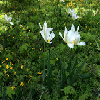

In [11]:
train_imgs_scaled = train_imgs.astype('float32')
val_imgs_scaled  = val_imgs.astype('float32')
train_imgs_scaled /= 255
val_imgs_scaled /= 255

#Vamos printar uma amostra:
print(train_imgs[2].shape)
array_to_img(train_imgs[2])

### Montando uma CNN básica

&emsp;Agora que temos um dataset bem definido, com imagens prontas para serem passadas à uma rede, vamos começar a organizar nosso primeiro modelo de análise: uma CNN pura, sem regularização ou augumentation. Para isso vamos definir o batch_size, o número de classes, as epochs e o formato do imput. Outra coisa que precisamos fazer é converter os labels para um formato que a rede compreenda, ela não entende strings, vamos usar o labelencoder, que vai atribuir numeros para cada classe:

In [12]:
batch_size = 30
num_classes = 5
epochs = 10  #Vamos começar com poucas epochs pois sei que é o suficiente neste modelo, sinta-se
#a vontade para testar com mais.
input_shape = (100, 100, 3)

#Importando a biblioteca do sklearn para lidar com as categorias
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()  #Criando o objeto
lb.fit(train_labels)  #Fitando ao treino
train_labels_enc = lb.transform(train_labels)  #Transforma o treino
val_labels_enc = lb.transform(val_labels)  #Transforma a validação

#Vamos analisar alguns labels, para ver se está tudo certo:
print(train_labels[:10], train_labels_enc[:10])

['daisy', 'sunflower', 'tulip', 'rose', 'tulip', 'rose', 'sunflower', 'sunflower', 'daisy', 'daisy'] [0 3 4 2 4 2 3 3 0 0]


&emsp;Finalmente podemos criar o modelo, vou recomendar importar do tensorflow, mas pode ser do próprio keras se quiser. Vamos definir a rede de forma mais simples possível, com 3 camadas convolucionais, com números crescentes de filtros, ativação relu, mas pode testar com sigmoid, e maxpooling. As fully-conected vamos com uma de 512 categorias, e uma com 5, para classificar. Compilar o modelo com a sparse_categorical_crossentropy:

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

&emsp;Tudo pronto, vamos utilizar o método fit nas imagens escalonadas que criamos,os labels codificados e a validação que temos:

In [14]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data = (val_imgs_scaled, val_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3028 samples, validate on 647 samples
Epoch 1/10
3028/3028 [==============================] - 22s 7ms/sample - loss: 1.3944 - accuracy: 0.3804 - val_loss: 1.1441 - val_accuracy: 0.4822
Epoch 2/10
3028/3028 [==============================] - 21s 7ms/sample - loss: 1.1056 - accuracy: 0.5294 - val_loss: 1.1581 - val_accuracy: 0.5533
Epoch 3/10
3028/3028 [==============================] - 22s 7ms/sample - loss: 0.9545 - accuracy: 0.6143 - val_loss: 0.9860 - val_accuracy: 0.6074
Epoch 4/10
3028/3028 [==============================] - 21s 7ms/sample - loss: 0.8281 - accuracy: 0.6711 - val_loss: 0.9590 - val_accuracy: 0.6244
Epoch 5/10
3028/3028 [==============================] - 21s 7ms/sample - loss: 0.6966 - accuracy: 0.7292 - val_loss: 1.0352 - val_accuracy: 0.6352
Epoch 6/10
3028/3028 [==============================] - 21s 7ms/sample - loss: 0.5499 - accuracy: 0.7850 - val_loss: 1.0515 - val_accuracy: 0.6337
Epoch 7/10
3028/3028 [==============================] - 20s 7ms/sample 

&emsp;Fazendo algo que poderia ter feito antes, mas definindo aqui as imagens do teste:

In [16]:
test_imgs = [img_to_array(load_img(img, target_size=img_shape)) for img in test_files]
test_labels = [fn.split('/')[8].strip() for fn in test_files]
test_imgs = np.array(test_imgs)
test_labels_enc = lb.transform(test_labels)
test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255

print('Test dataset shape:', test_imgs.shape)

Test dataset shape: (648, 100, 100, 3)


&emsp;Vamos salvar aqui este modelo para analisar posteriormente o teste com os outros modelos:

In [17]:
model.save('Modelo_Básico_CNN.h5')

&emsp;Vamos plotar o gráfico com o desempenho no treino e na validação do modelo, com o seguinte código retirado do Medium usado como referência:

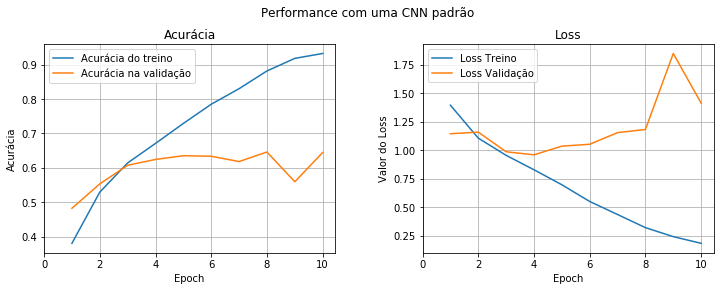

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Performance com uma CNN padrão', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['accuracy'], label='Acurácia do treino')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Acurácia na validação')
ax1.set_xticks(np.arange(0, 11, 2))
ax1.set_ylabel('Acurácia')
ax1.set_xlabel('Epoch')
ax1.set_title('Acurácia')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Loss Treino')
ax2.plot(epoch_list, history.history['val_loss'], label='Loss Validação')
ax2.set_xticks(np.arange(0, 11, 2))
ax2.set_ylabel('Valor do Loss')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

ax1.grid()
ax2.grid()

&emsp;Vemos que a acurácia na validação ficou em torno de 65%, inclusive pela curva é visível que a rede foi à um *overfit* completo. Vamos tentar melhorar um pouco o overfit utilizando algumas técnicas de regularização e augumentation.

### CNN com regularização e augumentation

&emsp;Nesta nova rede vamos utilizar apenas o dropout, adicionar uma nova camada densa eintroduzir mais uma camada de convolução. No import eu até coloquei as funções de Batch Normalization e Gaussian Noise, mas considero que são desnecessários e podem levar a rede à não conseguir aprender nada, mas sinta-se livre para testar.

In [19]:
from tensorflow.keras.layers import ELU, Dropout, BatchNormalization, GaussianNoise, LeakyReLU, ReLU

DROPOUT_RATE = 0.3   #Taxa de desligamento dos neurônios
size = [64, 128, 128] #Tamanho para as novas camadas convolucionais

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), input_shape=input_shape))
model.add(ReLU())         
model.add(MaxPooling2D((2, 2)))
for _ in range(3):  
    model.add(Conv2D(size.pop(), (3, 3)))
    model.add(ReLU())
    model.add(MaxPooling2D((2, 2)))
    
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(num_classes, activation='sigmoid'))


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
re_lu (ReLU)                 (None, 98, 98, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 128)       18560     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 47, 47, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 128)      

&emsp;Vamos utilizar um método de Augumentation em tempo real, ou seja, o nosso modelo vai ser alimentado com diferentes imagens toda epoch, e para isso usamos o ImageDataGenerator do tensorflow, alguns parâmetros estão definidos abaixo:

In [20]:
# Preprocessamento em tempo real de augumentation:
datagen_tr = ImageDataGenerator(
    rotation_range=40,  #Rotaciona a imagem de forma randomica (graus, 0 a 180)
    # Aleatórimente faz o shitf da imagem em fraçao, horizontalmente 
    width_shift_range=0.2,
    # Aleatórimente faz o shitf da imagem em fraçao, verticalmente 
    height_shift_range=0.2,
    # Adiciona um zoom na imagem
    zoom_range=0.2
)

datagen_tr.fit(train_imgs_scaled)

datagen_val = ImageDataGenerator()

datagen_val.fit(val_imgs_scaled)

&emsp;Como prentede-se reduzir o overfit, dificultando o aprendizado da rede, é necessário que o treinamento seja mais longo, para que ela tenha tempo de aprender as características do dataset, por isso vamos utilizar aqui 50 epochs.

In [21]:
epochs = 50

&emsp;Fazendo o fit do modelo com o gerador de imagens:

In [22]:
history = model.fit(datagen_tr.flow(train_imgs_scaled, train_labels_enc, batch_size=30),
                    validation_data=datagen_val.flow(val_imgs_scaled, val_labels_enc, batch_size=20),
                    epochs=epochs)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 101 steps, validate for 33 steps
Epoch 1/50
101/101 [==============================] - 30s 292ms/step - loss: 1.4063 - accuracy: 0.3649 - val_loss: 1.2699 - val_accuracy: 0.4699
Epoch 2/50
101/101 [==============================] - 32s 321ms/step - loss: 1.2363 - accuracy: 0.4617 - val_loss: 1.1307 - val_accuracy: 0.5425
Epoch 3/50
101/101 [==============================] - 32s 322ms/step - loss: 1.1558 - accuracy: 0.5188 - val_loss: 1.1822 - val_accuracy: 0.5301
Epoch 4/50
101/101 [==============================] - 33s 324ms/step - loss: 1.0794 - accuracy: 0.5528 - val_loss: 0.9732 - val_accuracy: 0.6291
Epoch 5/50
101/101 [==============================] - 31s 310ms/step - loss: 1.0391 - accuracy: 0.5898 - val_loss: 1.0699 - val_accuracy: 0.6105
Epoch 6/50
101/101 [==============================] - 31s 308ms/step - loss: 0.9996 - accuracy: 0.6212 - val_loss: 0.9414 - val_accuracy: 0.6491
Epoch 7/50
101/101 [=================

In [23]:
model.save('Modelo_Reg_Aug_CNN.h5') #Salvando o modelo

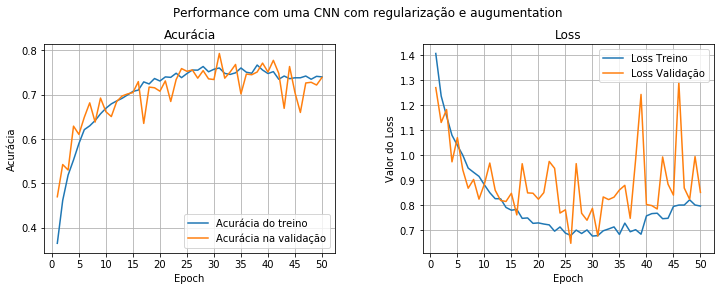

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Performance com uma CNN com regularização e augumentation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 51))
ax1.plot(epoch_list, history.history['accuracy'], label='Acurácia do treino')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Acurácia na validação')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Acurácia')
ax1.set_xlabel('Epoch')
ax1.set_title('Acurácia')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Loss Treino')
ax2.plot(epoch_list, history.history['val_loss'], label='Loss Validação')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Valor do Loss')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

ax1.grid()
ax2.grid()

&emsp;Aqui vemos como a valição e o treino se acompanham, de fato conseguimos evitar o overfit e elevamos bastante a acurácia da validação, aumentando a capacidade de generalização do modelo. A loss varia bastante mas isso é normal e uma learning rate menor pode suavizar o processo. 

### Transfer Learning

&emsp;Por fim chegamos ao tema em sí deste notebook, vamos tratar do transfer learning. Primeiramente vamos importar a rede que usaremos como transfer: a VGG-16 treinada com o imagenet. Para maiores informações sobre ela, o leitor pode voltar na parte que passei os links sobre as redes estado da arte. Aqui vamos importá-la sem as camadas densas:

In [26]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model
import tensorflow.keras

vgg = vgg16.VGG16(include_top=False,  #Parâmetro responsável por incluir ou descartar as camadas Fully-connected
                  weights='imagenet', 
                  input_shape=input_shape)

print(vgg.layers[-1].output)

Tensor("block5_pool_1/Identity:0", shape=(None, 3, 3, 512), dtype=float32)


&emsp;Pela saída acima, como mandamos o *import* não trazer as camadas FC, temos que a última camada da VGG que importamos é a última camada de *maxpooling* do último bloco de convolução da rede, ficou confuso? A seguinte imagem vai te ajudar a compreender o que digo, prete atenção ao nome da camada acima, e os nomes na imagem:

<img src = "https://miro.medium.com/max/1210/1*E7zhhan7Sp7hats4jkKdeA.png">

Fonte:[Medium](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a)

&emsp;De forma que temos tudo que está na imagem até a última camada de *pooling*, precisamos agora formar o nosso modelo, adicionando a *flatten* e as *fully-connected*:

In [27]:
saida = vgg.layers[-1].output           #Última camada presente no nosso modelo
saida = tensorflow.keras.layers.Flatten()(saida)  
vgg_model = Model(vgg.input, saida)    #Concatenando o modelo que temos com o *flatten*
print(saida)

Tensor("flatten_2/Identity:0", shape=(None, 4608), dtype=float32)


&emsp;Com a manipulação acima conseguimos adicionar o *flatten* ao nosso novo modelo, falta adicionar as camadas FC, mas como prendemos fixar os pesos para todas as camadas até aqui, vamos fazer isso primeiro, que fica mais fácil:

In [28]:
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

&emsp;A seguir vamos criar as camadas *fully-connected* e ligá-las à nossa rede:

In [29]:
from tensorflow.keras.layers import InputLayer

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               2359808   
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 2565      
Total params: 2,625,029
Trainable params: 2,625,029
Non-trainable params: 0
_________________________________________________________________


&emsp;Para facilitar, não vamos unir ambas as redes neste ponto, um bom motivo para isso é que demora muito tempo para passar as imagens pela arquitetura da VGG com as camadas *fully-connected* junto, por outro lado se processar as imagens pelas camadas convolucionais antes, e depois passar pela rede é muito mais e rápido, pois fazemos isto apenas uma vez, ao invés de fazer 'epoch' vezes. Além disso se algo ocorrer é melhor ter a saída deste modelo salva para que não seja necessário ficar rodando constantemente isso. No seu computador pessoal isso pode parecer besteira, mas em uma cloud ficar rodando várias vezes a mesma coisa é perder dinheiro.

In [30]:
def passar_pela_vgg(model, input_img):  #Função responsável por passar a imagem pela VGG-16
    saida = model.predict(input_img, verbose=0)
    return saida
    
train_vgg = passar_pela_vgg(vgg_model, train_imgs_scaled)
val_vgg = passar_pela_vgg(vgg_model, val_imgs_scaled)

print('Imagens de treino pela VGG:', train_vgg.shape)
print('Imagens de validaação pela VGG:', val_vgg.shape)


Imagens de treino pela VGG: (3028, 4608)
Imagens de validaação pela VGG: (647, 4608)


&emsp;Com as imagens prontas e o modelo de camadas totalmente conectadas pronto, vamos para o método *fit*. Lembrando que aqui não vamos valer de regularização e de augumentation, primeiro vamos analisar o desempenho puro da VGG.

In [31]:
epochs = 30
history = model.fit(x=train_vgg, y=train_labels_enc,
                    validation_data=(val_vgg, val_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3028 samples, validate on 647 samples
Epoch 1/30
3028/3028 [==============================] - 3s 1ms/sample - loss: 1.0785 - accuracy: 0.5938 - val_loss: 0.8167 - val_accuracy: 0.7032
Epoch 2/30
3028/3028 [==============================] - 3s 854us/sample - loss: 0.7243 - accuracy: 0.7328 - val_loss: 0.7102 - val_accuracy: 0.7372
Epoch 3/30
3028/3028 [==============================] - 3s 872us/sample - loss: 0.5895 - accuracy: 0.7906 - val_loss: 0.6934 - val_accuracy: 0.7403
Epoch 4/30
3028/3028 [==============================] - 3s 835us/sample - loss: 0.4956 - accuracy: 0.8243 - val_loss: 0.6441 - val_accuracy: 0.7774
Epoch 5/30
3028/3028 [==============================] - 3s 827us/sample - loss: 0.4268 - accuracy: 0.8550 - val_loss: 0.6606 - val_accuracy: 0.7573
Epoch 6/30
3028/3028 [==============================] - 3s 869us/sample - loss: 0.3642 - accuracy: 0.8752 - val_loss: 0.6309 - val_accuracy: 0.7867
Epoch 7/30
3028/3028 [==============================] - 3s 862us/sa

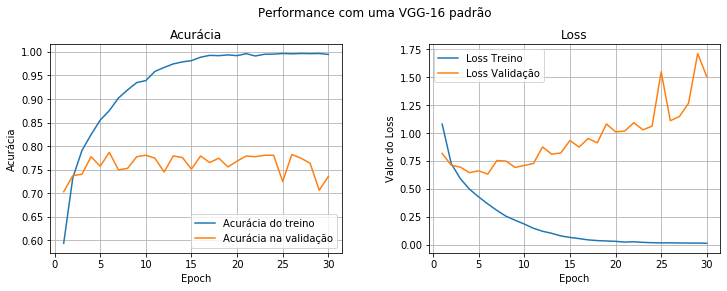

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Performance com uma VGG-16 padrão', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Acurácia do treino')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Acurácia na validação')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Acurácia')
ax1.set_xlabel('Epoch')
ax1.set_title('Acurácia')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Loss Treino')
ax2.plot(epoch_list, history.history['val_loss'], label='Loss Validação')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Valor do Loss')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

ax1.grid()
ax2.grid()

&emsp;Visivelmente esse nosso transfer *off the shelf features* conseguiu atingir a mesma acurácia que o modelo com regularização e com augumentation, mas o detalhe é que este passou por um overfit também, logo estas técnicas podem ajudar a reduzir o mesmo, aumentando o desempenho geral da rede.

In [33]:
model.save('Modelo_Transfer_Básico.h5')

### Transfer Learning com Regularização e Augumentation

&emsp;O resultado acima foi realmente muito bom, sem quase nenhum esforço já foi possível alcançar praticamente o mesmo resultado obtido pela nossa rede manual com regularização e augumentation, mas ainda não chegamos ao limite, claro, visto que o gráfico acima mostra que a rede leva ao overfitting, portanto podemos utilizar as técnicas descritas anteriormente para reduzir o mesmo e aumentar ainda mais o desempenho, vamos ver agora como fazer isso.

In [34]:
# This will do preprocessing and realtime data augmentation:
datagen_tr = ImageDataGenerator(
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.2,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.2,
    zoom_range=0.2)

datagen_tr.fit(train_imgs_scaled)

datagen_val = ImageDataGenerator()

datagen_val.fit(val_imgs_scaled)

In [35]:
model = Sequential()

model.add(vgg_model)
model.add(Dense(512, input_dim=input_shape))
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(100))  #Adicionar mais uma densa com 100 neurônios
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(5, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=5e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 4608)              14714688  
_________________________________________________________________
dense_8 (Dense)              (None, 512)               2359808   
_________________________________________________________________
re_lu_4 (ReLU)               (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_5 (ReLU)               (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

&emsp;Novamente como a intenção é reduzir o overfitting vou utilizar mais epochs, para conseguir analisar melhor o comportamento da rede:

In [36]:
history = model.fit(datagen_tr.flow(train_imgs_scaled, train_labels_enc, batch_size=30),
                    validation_data=datagen_val.flow(val_imgs_scaled, val_labels_enc, batch_size=20),
                    epochs=40,
                    steps_per_epoch=100)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 33 steps
Epoch 1/40
100/100 [==============================] - 122s 1s/step - loss: 1.4910 - accuracy: 0.3596 - val_loss: 1.2631 - val_accuracy: 0.5765
Epoch 2/40
100/100 [==============================] - 126s 1s/step - loss: 1.2588 - accuracy: 0.5223 - val_loss: 1.0445 - val_accuracy: 0.6198
Epoch 3/40
100/100 [==============================] - 126s 1s/step - loss: 1.1385 - accuracy: 0.5664 - val_loss: 0.9621 - val_accuracy: 0.6615
Epoch 4/40
100/100 [==============================] - 126s 1s/step - loss: 1.0619 - accuracy: 0.6001 - val_loss: 0.8601 - val_accuracy: 0.6909
Epoch 5/40
100/100 [==============================] - 126s 1s/step - loss: 0.9806 - accuracy: 0.6394 - val_loss: 0.8340 - val_accuracy: 0.6986
Epoch 6/40
100/100 [==============================] - 130s 1s/step - loss: 0.9398 - accuracy: 0.6544 - val_loss: 0.7785 - val_accuracy: 0.7187
Epoch 7/40
100/100 [=============================

In [37]:
model.save('Modelo_Transfer_Reg_Aug.h5') #Salvando o modelo para posterior anáise

### Transfer Learning com ajuste fino de parâmetros

&emsp;Vemos acima que o modelo alcançou melhores resultados na validação que o transfer puro, além de inibir o overfitting. O ganho de desempenho foi relativamente pequeno visto que não deixei o modelo treinar por tempo suficiente, devido às limitações importas pelo meu hardware, como da pra ver pelo tempo em cada epoch, ainda assim é visível que esse modelo é melhor que o anterior.

&emsp;Mas será que não conseguimos melhorá-lo ainda mais? Até aqui estamos utilizando apenas a estratégia *off the shelf*, vamos tentar utilizar o *fine-tuning*, lembrando que está é mais custosa pois temos mais parâmetros treináveis. Vamos habilitar o treino apenas em uma camada de convolução do nosso modelo, a última, mas poderíamos fazer isso com mais camadas, a tendência é qua as últimas camadas de convolução busquem features de mais alto nível, de forma que o ideal é treinar estas para as particularidades do nosso dataset. A imagem a seguir ilustra as *features* que cada camada tende a procurar:

<img src = https://dpzbhybb2pdcj.cloudfront.net/elgendy/v-8/Figures/01-04_img_0184.png>

Fonte: [3 Convolutional Neural Networks (CNNs)](https://livebook.manning.com/book/grokking-deep-learning-for-computer-vision/chapter-3/v-8/118)

&emsp;Enquanto as camadas iniciais buscam por *features* mais simples, e portanto mais genéricas, as mais profundas buscam *featuers* mais complexas e específicas. Por isso esses modelos estado da arte funcionam tão bem independente do caso de transfer que você executa, pois a capacidade delas em identificar característica de baixo nível é muito avançada, logo se treinar-mos as camadas finais a tendência é que o modelo fique ainda melhor, vamos testar:

In [38]:
vgg_model.trainable = True  #Permitindo o treino

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1']: #Habilitamos o treino apenas para a última camada
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

&emsp;Como o treino novamente é demorado vou voltar a utilizar apenas 10 epochs, mas será o suficiente para ver o poder do modelo, vou utilizar ainda o augumentation e o dropout:

In [39]:
model = Sequential()

model.add(vgg_model)
model.add(Dense(512, input_dim=input_shape))
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(ReLU())
model.add(Dropout(0.2))
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(5, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

history = model.fit(datagen_tr.flow(train_imgs_scaled, train_labels_enc, batch_size=30),
                    validation_data=datagen_val.flow(val_imgs_scaled, val_labels_enc, batch_size=20),
                    epochs=10,
                    steps_per_epoch=100)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 33 steps
Epoch 1/10
100/100 [==============================] - 802s 8s/step - loss: 1.0656 - accuracy: 0.5797 - val_loss: 0.6595 - val_accuracy: 0.7682
Epoch 2/10
100/100 [==============================] - 818s 8s/step - loss: 0.7329 - accuracy: 0.7308 - val_loss: 0.5678 - val_accuracy: 0.8006
Epoch 3/10
100/100 [==============================] - 801s 8s/step - loss: 0.6251 - accuracy: 0.7705 - val_loss: 0.5898 - val_accuracy: 0.7805
Epoch 4/10
100/100 [==============================] - 810s 8s/step - loss: 0.5396 - accuracy: 0.8065 - val_loss: 0.4754 - val_accuracy: 0.8362
Epoch 5/10
100/100 [==============================] - 797s 8s/step - loss: 0.4878 - accuracy: 0.8329 - val_loss: 0.4610 - val_accuracy: 0.8393
Epoch 6/10
100/100 [==============================] - 1964s 20s/step - loss: 0.4431 - accuracy: 0.8396 - val_loss: 0.6211 - val_accuracy: 0.8238
Epoch 7/10
100/100 [===========================

In [40]:
model.save('Modelo_Transfer_Fine.h5')

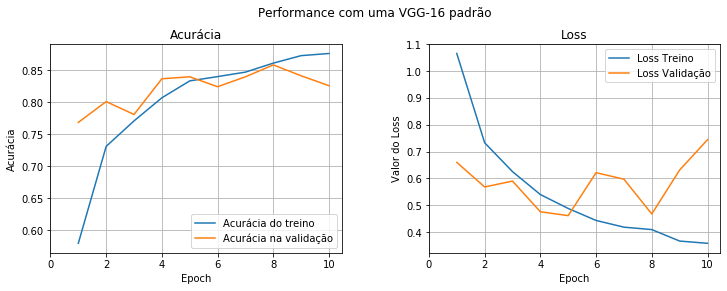

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Performance com uma VGG-16 padrão', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['accuracy'], label='Acurácia do treino')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Acurácia na validação')
ax1.set_xticks(np.arange(0, 11, 2))
ax1.set_ylabel('Acurácia')
ax1.set_xlabel('Epoch')
ax1.set_title('Acurácia')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Loss Treino')
ax2.plot(epoch_list, history.history['val_loss'], label='Loss Validação')
ax2.set_xticks(np.arange(0, 11, 2))
ax2.set_ylabel('Valor do Loss')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

ax1.grid()
ax2.grid()

&emsp;Incrível a evolução do modelo né? Esse é o poder de um *transfer learning* com arquiteturas estado-da-arte. Vale ver que o modelo não vai ao overfitting e que ainda poderíamos tentar obter maior acurácia, mas vamos ficar com este por enquanto, já é visível o ganho que o modelo proporciona.

### Avaliando os resultados no treino

&emsp;Vamos agora analisar a eficiência dos modelos no domínio de teste, e para tal precisamos primeiro fazer o load de cada um:

In [43]:
from tensorflow.keras.models import load_model

basica = load_model('Modelo_Básico_CNN.h5')
basica_aug_reg = load_model('Modelo_Reg_Aug_CNN.h5')
transfer = load_model('Modelo_Transfer_Básico.h5')
transfer_aug_red = load_model('Modelo_Transfer_Reg_Aug.h5')
transfer_fine = load_model('Modelo_Transfer_Fine.h5')

In [44]:
pred = basica.evaluate(test_imgs_scaled, test_labels_enc)
print('Acurácia no Teste: {}'.format(pred[1]))
print('Loss no Teste: {}'.format(pred[0]))

648/648 [==============================] - 1s 1ms/sample - loss: 1.3061 - accuracy: 0.6775
Acurácia no Teste: 0.6774691343307495
Loss no Teste: 1.306059303475015


&emsp;A rede básica de CNN nos proporcionou uma acurácia de 67.7%, bastante razoável até para um dataset complicado como este, mas abaixo do esperado, vamos ver o próximo.

In [45]:
pred = basica_aug_reg.evaluate(test_imgs_scaled, test_labels_enc)
print('Acurácia no Teste: {}'.format(pred[1]))
print('Loss no Teste: {}'.format(pred[0]))

648/648 [==============================] - 1s 2ms/sample - loss: 0.8273 - accuracy: 0.7500
Acurácia no Teste: 0.75
Loss no Teste: 0.8272964586446314


&emsp;Nossa tentativa de aumentar o desempenho evitando o overfit da rede funcionou bem e nos deu um ganho de 8% no teste, que é muito bom, lembrando que quando mais alto o desempenho, mais vale 1% de aumento. Ainda assim ainda não fizemos o transfer, vamos ver como ele foi:
Ps: Eu re-executei a vgg pois alteramos o objeto ao longo do código então para avaliar corretamente só copiei as células anteriores, nada de novo.

In [46]:
input_shape = (100, 100, 3)
vgg = vgg16.VGG16(include_top=False,  #Parâmetro responsável por incluir ou descartar as camadas Fully-connected
                  weights='imagenet', 
                  input_shape=input_shape)

saida = vgg.layers[-1].output           #Última camada presente no nosso modelo
saida = tensorflow.keras.layers.Flatten()(saida)  
vgg_model = Model(vgg.input, saida)    #Concatenando o modelo que temos com o *flatten*

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

test_vgg = passar_pela_vgg(vgg_model, test_imgs_scaled)

pred = transfer.evaluate(test_vgg, test_labels_enc)
print('Acurácia no Teste: {}'.format(pred[1]))
print('Loss no Teste: {}'.format(pred[0]))

648/648 [==============================] - 0s 289us/sample - loss: 1.5908 - accuracy: 0.7253
Acurácia no Teste: 0.7253086566925049
Loss no Teste: 1.5908256401250391


&emsp;Um transfer puro, sem augumentation e *Off the shelf features* já nos deu um resultado robusto no teste de 72,5% de acurácia, lembrando que aqui também houve overfitting, então tentamos melhorar o desempenho com augumentation, nesse caso realmente não consegui treinar a rede muito por conta do meu computador, mas vamos lá:

In [47]:
pred = transfer_aug_red.evaluate(test_imgs_scaled, test_labels_enc)
print('Acurácia no Teste: {}'.format(pred[1]))
print('Loss no Teste: {}'.format(pred[0]))

648/648 [==============================] - 28s 44ms/sample - loss: 0.6420 - accuracy: 0.7623
Acurácia no Teste: 0.7623456716537476
Loss no Teste: 0.6420142312108734


&emsp;Este transfer nos proporcionou um aumento até mesmo em relação ao modelo de CNN com augumentation e regularização, chegando à 76%. Mas ainda não conseguimos o melhor resultado possível, vamos ver como o *fine-tuning*, aliado às outras técnicas conseguiu performar:

In [48]:
pred = transfer_fine.evaluate(test_imgs_scaled, test_labels_enc)
print('Acurácia no Teste: {}'.format(pred[1]))
print('Loss no Teste: {}'.format(pred[0]))

648/648 [==============================] - 33s 50ms/sample - loss: 0.7657 - accuracy: 0.8318
Acurácia no Teste: 0.8317901492118835
Loss no Teste: 0.7657408302212939


&emsp;Simplesmente chegamos à 83% de acurácia em apenas 10 epochs, com muito espaço pra aumentar esse resultado, tanto no tempo de treino, quanto no *learning rate* quanto treinando mais camadas de convolução. Realmente se trata de um modelo extremamente robusto, um ganho total de 26% em relação ao resultado original é muito significativo. Entendem agora o porquê o *transfer learning* é um tópico tão relevante?

&emsp;Gostaria de agradecer Dipanjan Sakar por seu post incrivelmente completo no Medium: [A Comprehensive Hands-on Guide to Transfer Learning with Real-World Applications in Deep Learning](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a), uma vez que todo o texto aqui exposto foi baseado no que ele escreveu e no caminho lógico que desenvolveu, bem como seu exemplo prático. Se você chegou até aqui e ainda está interessado no tema, recomendo a leitura, muitos assuntos mais secundários eu não adicionei mas ele desenvolve.